# Naive Forecasting
Katlyn Goeujon-Mackness <br>
31/03/2025

A **baseline model** in time series analysis is a trivial solution that uses heuristics (simple statistics) to compute a forecast. It is used to compare more complex models in order to judge performance. <br> 
This notebook explores four example types of baseline model:
- Historical mean
- Last year's mean
- Last known value
- Seasonal forecast

## Data Overview
This example uses quarterly earnings per share (EPS) data of Johnson & Johnson for the years 1960 to the end of 1979. The four quarters of 1980 will be predicted.

In [11]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the sample data
df = pd.read_csv("data/jj.csv")
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [4]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


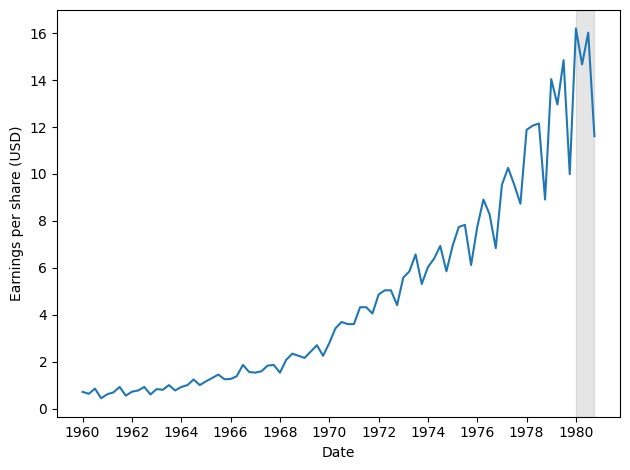

In [38]:
# Plot data in a line graph
fig, ax = plt.subplots()

ax.plot(df['date'], df['data'])
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80,83, color="#808080", alpha=0.2)

plt.xticks(np.arange(0,81,8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
plt.tight_layout()

## Data Modeling

In [7]:
# Split data into training and test sets
#  The last four entries are used to test the predicitons from the remaining entries
train = df[:-4]
test = df[-4:]

### 1. Historical mean

In [29]:
historical_mean = np.mean(train['data'])
print(historical_mean)

4.308499987499999


In [ ]:
# Naively forecast for each quarter of 1980
test.loc[:, 'pred_mean'] = historical_mean
test

,date,data,pred_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


In [19]:
# Calculate mean absolute percentage error (MAPE)
#  Returns % of how much the forecast values deviate
#  from the actual values on avg

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [31]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
print(mape_hist_mean)

70.00752579965119


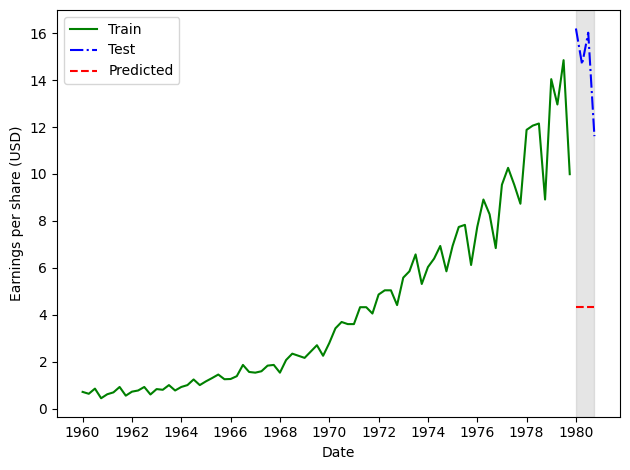

In [39]:
# Visualize the historical mean forecast
# Plot data in a line graph
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-', label="Train")
ax.plot(test['date'], test['data'], 'b-.', label="Test")
ax.plot(test['date'], test['pred_mean'], 'r--', label="Predicted")

ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80,83, color="#808080", alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0,85,8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
plt.tight_layout()

Comments: The prediction line is significantly different than the actual values for 1980. Given the obvious and consistent upward trend, historical mean is likely not the most effective baseline. A more recent period of time could improve the prediction.

### 2. Last year's mean

In [40]:
# Calculate the mean from the last year of the training set data (1979)
last_year_mean = np.mean(train.data[-4:])
print(last_year_mean)

12.96


In [45]:
# Create a new column with the last year's mean value
test.loc[:, 'pred_last_yr_mean'] = last_year_mean
test

,date,data,pred_mean,pred_last_yr_mean
80,1980-01-01,16.20,4.3085,12.96
81,1980-04-01,14.67,4.3085,12.96
82,1980-07-02,16.02,4.3085,12.96
83,1980-10-01,11.61,4.3085,12.96


In [42]:
# Calculate MAPE
mape_last_yr_mean = mape(test['data'], test['pred_last_yr_mean'])
print(mape_last_yr_mean)

15.5963680725103


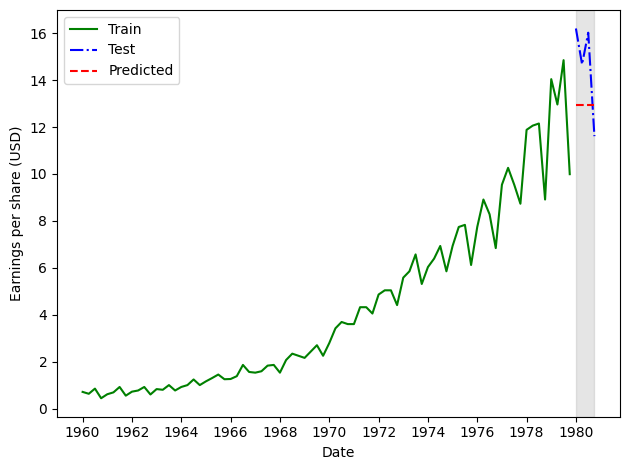

In [43]:
# Visualize last year's mean forecast
# Plot data in a line graph
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-', label="Train")
ax.plot(test['date'], test['data'], 'b-.', label="Test")
ax.plot(test['date'], test['pred_last_yr_mean'], 'r--', label="Predicted")

ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80,83, color="#808080", alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0,85,8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
plt.tight_layout()

Comments: The last year's mean baseline is a clear improvement on the overall mean.

### 3. Last known value

In [44]:
# Extract the last known value from the training set
#  (last quarter of 1979)
last = train.data.iloc[-1]
print(last)

9.99


In [46]:
# Create a new column to display the last known value
test.loc[:,'pred_last'] = last
test

,date,data,pred_mean,pred_last_yr_mean,pred_last
80,1980-01-01,16.20,4.3085,12.96,9.99
81,1980-04-01,14.67,4.3085,12.96,9.99
82,1980-07-02,16.02,4.3085,12.96,9.99
83,1980-10-01,11.61,4.3085,12.96,9.99


In [47]:
# Calculate the MAPE for the last known value
mape_last = mape(test['data'], test['pred_last'])
print(mape_last)

30.457277908606535


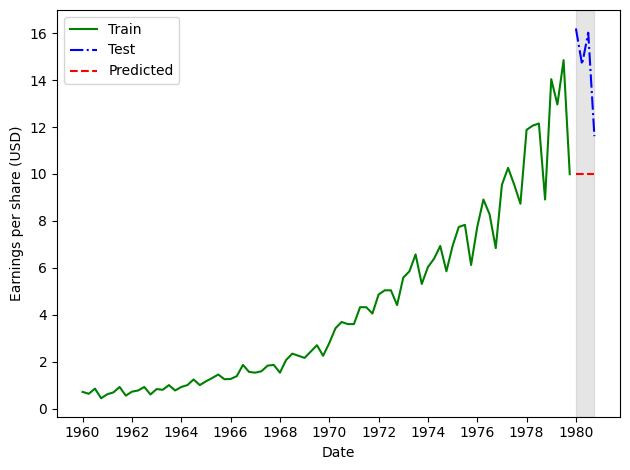

In [48]:
# Visualize last known value forecast
# Plot data in a line graph
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-', label="Train")
ax.plot(test['date'], test['data'], 'b-.', label="Test")
ax.plot(test['date'], test['pred_last'], 'r--', label="Predicted")

ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80,83, color="#808080", alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0,85,8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
plt.tight_layout()

Comments: The last known value did not improve the MAPE score compared to the last year's values mean. This makes sense due to the cyclical behavior of this data, which displays a sharp fall in the last quarter.

### 4. Seasonal forecast
Considering the seasonal cyclical behavior of the data, seasonal forecast could be useful as a baseline model. This baseline model take the last observed cycle and repeats it into the future.

In [50]:
# Assign the last four values (the four quarters of 1979) 
#  to corresponding quarters in 1980

# Append values to the test DataFrame to hold the predictions
test.loc[:, 'pred_last_season'] = train['data'][-4:].values
test

,date,data,pred_mean,pred_last_yr_mean,pred_last,pred_last_season
80,1980-01-01,16.20,4.3085,12.96,9.99,14.04
81,1980-04-01,14.67,4.3085,12.96,9.99,12.96
82,1980-07-02,16.02,4.3085,12.96,9.99,14.85
83,1980-10-01,11.61,4.3085,12.96,9.99,9.99


In [51]:
# Calculate the MAPE for seasonal forecast
mape_seasonal = mape(test['data'], test['pred_last_season'])
print(mape_seasonal)

11.561658552433654


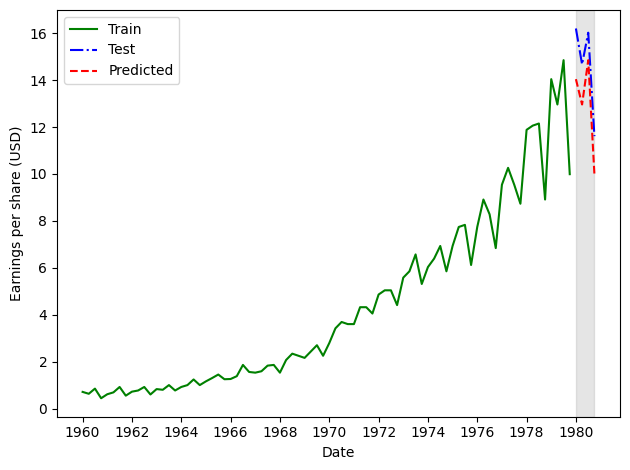

In [52]:
# Visualize the seasonal forecast
# Plot data in a line graph
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-', label="Train")
ax.plot(test['date'], test['data'], 'b-.', label="Test")
ax.plot(test['date'], test['pred_last_season'], 'r--', label="Predicted")

ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80,83, color="#808080", alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0,85,8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
plt.tight_layout()

Comments: This baseline has the lowest MAPE of all the rest, and we can see visually that the seasonal forecast fits the best to the actual data because of the differences between seasons.